## Importing liabraries and Dataset

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

In [4]:
# Importing Dataset:

data =  pd.read_csv("telecom_churn_data.csv")
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
data.shape

(99999, 226)

In [6]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Data Cleaning

In [7]:
data.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [8]:
# Imputing the below columns with 0  
impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']
data[impute] = data[impute].apply(lambda x: x.fillna(0))

In [9]:
null_cols = (((data.isnull().sum()/len(data)*100)).to_frame('null_values')).sort_values('null_values', ascending=False)
null_cols

,null_values
fb_user_6,74.846748
night_pck_user_6,74.846748
count_rech_3g_6,74.846748
arpu_2g_6,74.846748
date_of_last_rech_data_6,74.846748
count_rech_2g_6,74.846748
arpu_3g_6,74.846748
arpu_3g_7,74.428744
fb_user_7,74.428744
arpu_2g_7,74.428744


In [10]:
# Column having more than 30% null values
drop_cols = list(null_cols.index[null_cols['null_values'] > 30])

In [11]:
# Dropping the columns having more than 30% missing values
data = data.drop(drop_cols, axis=1)

In [12]:
data.shape

(99999, 198)

In [13]:
# List of date columns
date_cols = [k for k in data.columns.to_list() if 'date' in k]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [14]:
# Dropping date columns as they are not required
data = data.drop(date_cols, axis=1)

In [15]:
data.shape

(99999, 190)

In [16]:
null_cols_2 = (((data.isnull().sum()/len(data)*100)).to_frame('null_values')).sort_values('null_values', ascending=False)
null_cols_2

,null_values
isd_og_mou_9,7.745077
offnet_mou_9,7.745077
loc_og_t2m_mou_9,7.745077
og_others_9,7.745077
loc_og_t2f_mou_9,7.745077
loc_og_t2t_mou_9,7.745077
loc_ic_t2t_mou_9,7.745077
std_og_mou_9,7.745077
loc_ic_t2m_mou_9,7.745077
roam_og_mou_9,7.745077


In [17]:
data.dtypes

mobile_number           int64
circle_id               int64
loc_og_t2o_mou        float64
std_og_t2o_mou        float64
loc_ic_t2o_mou        float64
arpu_6                float64
arpu_7                float64
arpu_8                float64
arpu_9                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
onnet_mou_9           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
offnet_mou_9          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_ic_mou_9         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
roam_og_mou_9         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2t_mou_9      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2m_mou_9      float64
loc_og_t2f

In [18]:
# Convert mobile number to object
data['mobile_number']=data['mobile_number'].astype('object')
data['mobile_number'].head()

0    7000842753
1    7001865778
2    7001625959
3    7001204172
4    7000142493
Name: mobile_number, dtype: object

In [19]:
# Intuitively missing values are because, the user has not recharged in the months under consideration.
# Based on this assumption, all the mentioned variables excpet date are imputed with '0' function ot impute values
def impute(*args):
  for col in args:
    data[col].fillna(0,inplace=True)

    
num_col = data.select_dtypes(include= np.number).columns.tolist()
impute(*num_col)

In [20]:
null_cols_3 = (((data.isnull().sum()/len(data)*100)).to_frame('null_values')).sort_values('null_values', ascending=False)
null_cols_3

,null_values
mobile_number,0.0
ic_others_7,0.0
spl_ic_mou_6,0.0
spl_ic_mou_7,0.0
spl_ic_mou_8,0.0
spl_ic_mou_9,0.0
isd_ic_mou_6,0.0
isd_ic_mou_7,0.0
isd_ic_mou_8,0.0
isd_ic_mou_9,0.0


In [21]:
# Deriving new variable total recharge amount for data: total_rech_amt_data
data['total_data_rech_6'] = data.total_rech_data_6 * data.av_rech_amt_data_6
data['total_data_rech_7'] = data.total_rech_data_7 * data.av_rech_amt_data_7
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,252.0,252.0
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,

In [22]:
# The total recharge amount for June and July
data['amt_data_6'] = data.total_rech_amt_6 + data.total_data_rech_6
data['amt_data_7'] = data.total_rech_amt_7 + data.total_data_rech_7

In [23]:
# Average recharge done by customer in June and July
data['av_amt_data_6_7'] = (data.amt_data_6 + data.amt_data_7)/2

In [24]:
data[['av_amt_data_6_7', 'total_data_rech_6', 'total_data_rech_7', 'amt_data_6', 'amt_data_7']].head()

,av_amt_data_6_7,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7
0,559.0,252.0,252.0,614.0,504.0
1,306.0,0.0,154.0,74.0,538.0
2,241.5,0.0,0.0,168.0,315.0
3,270.0,0.0,0.0,230.0,310.0
4,301.0,56.0,0.0,252.0,350.0


In [25]:
# Since our High value customers are determined based on average recharge value for month 6 & 7,
# Extracting High value customers where total average recharge amount for good phase > 70th percentile
cust = data.loc[data.av_amt_data_6_7 > data.av_amt_data_6_7.quantile(0.7), :]
cust = cust.reset_index(drop=True)
cust.shape

(29953, 195)

In [26]:
# Deleting extra variables created
cust = cust.drop(['total_data_rech_6', 'total_data_rech_7','amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
cust.shape

(29953, 190)

In [27]:
cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58
1,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,0

In [28]:
# Tag churners and remove attributes of the churn phase
# Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase
# The attributes you need to use to tag churners are: total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

def churn_def(row):
    if (row['total_ic_mou_9']==0) & (row['total_og_mou_9']==0) &(row['vol_2g_mb_9']==0) & (row['vol_3g_mb_9']==0):
        return 1
    else: return 0

In [29]:
cust['Churn'] = cust.apply(churn_def,axis=1)
cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,1
1,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.6

In [30]:
# Percentage of churned customers
(round(cust['Churn'].sum()/len(cust),2))*100

8.0

In [31]:
# Dropping all features corresponding to the churn phase
col_9=[col for col in cust.columns if '_9' in col]
cust.drop(col_9,axis=1, inplace=True)
cust.shape

(29953, 146)

## EDA

In [31]:
# Check the percenatges of churn and non-churn customers
cust["Churn"].value_counts(normalize=True)

0    0.918773
1    0.081227
Name: Churn, dtype: float64

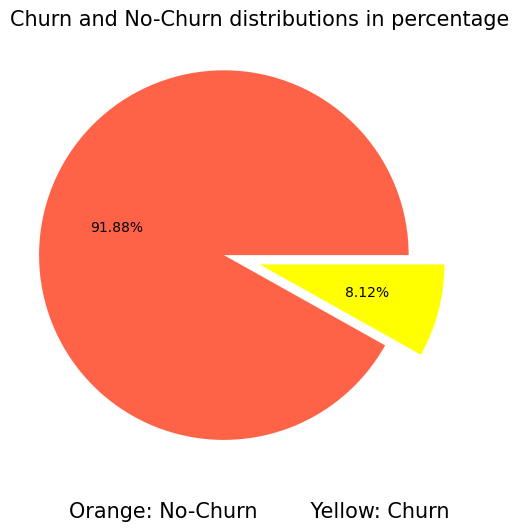

In [32]:
# plot to Check percetanges of churn and non churn data
plt.figure(figsize=(8,6))
plt.pie(cust["Churn"].value_counts(normalize=True),autopct='%1.2f%%', explode=[0.2,0],colors=["tomato","yellow"])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Churn and No-Churn distributions in percentage",fontsize=15)
plt.xlabel("Orange: No-Churn        Yellow: Churn",fontsize=15)
plt.show()


# Observation:
# ~92% of the customers belong to No-churn and ~8% belong to Churn groups respectively.

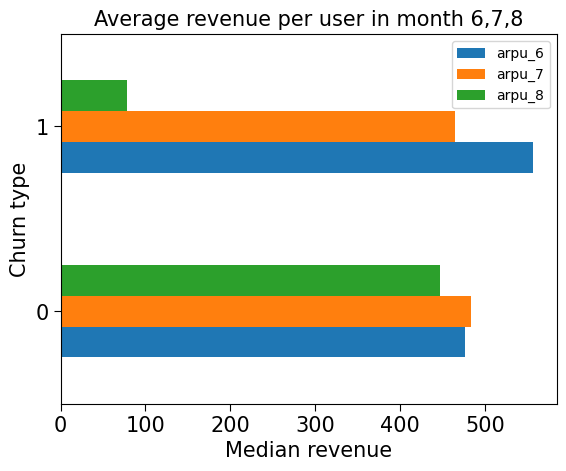

In [33]:
# Plotting average revenue per user(ARPU) for months 6,7,8
cust.groupby("Churn")["arpu_6","arpu_7","arpu_8"].median().plot.barh()
plt.title("Average revenue per user in month 6,7,8",fontsize=15)
plt.tick_params(size=5,labelsize = 15) 
plt.ylabel("Churn type",fontsize=15)
plt.xlabel("Median revenue",fontsize=15)
plt.show()

# Observation:
# Average revenue per user is more in month 6 for customer who will Churn and ARPU is more in month 7 for non Churn customers
# The variance in monthly ARPU is high in churn customers viz-a-viz non churn customers 

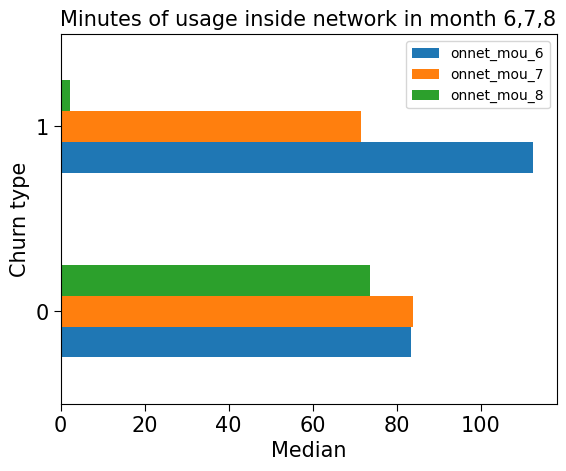

In [34]:
## Ploting onnet_mou for months 6,7,8
cust.groupby("Churn")["onnet_mou_6","onnet_mou_7","onnet_mou_8" ].median().plot.barh()
plt.tick_params(size=5,labelsize = 15) 
plt.title("Minutes of usage inside network in month 6,7,8",fontsize=15)
plt.ylabel("Churn type",fontsize=15)
plt.xlabel("Median",fontsize=15)
plt.show()

# Observation:
# MOU is more in month 6 for churn customers and MOU is more in month 7 for non churn customers
# MOU for non churn customers are lower than of churn customers
# The variance in monthly MOU is high in churn customers viz-a-viz non churn customers 

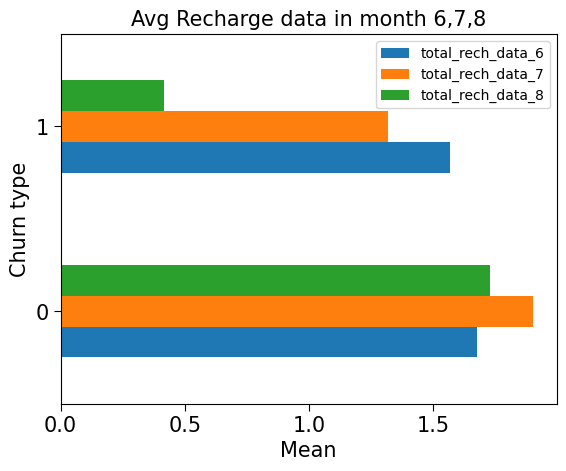

In [35]:
# Plotting total_rech_data for months 6,7,8
cust.groupby("Churn")["total_rech_data_6","total_rech_data_7","total_rech_data_8" ].mean().plot.barh()
plt.tick_params(size=5,labelsize = 15) 
plt.title("Avg Recharge data in month 6,7,8",fontsize=15)
plt.ylabel("Churn type",fontsize=15)
plt.xlabel("Mean",fontsize=15)
plt.show()

# Observation:
# Average recharge amount by non churn customers is higher than churn customers
# The variance in the average monthly recharge amount is higher in churn customers than non churn customers

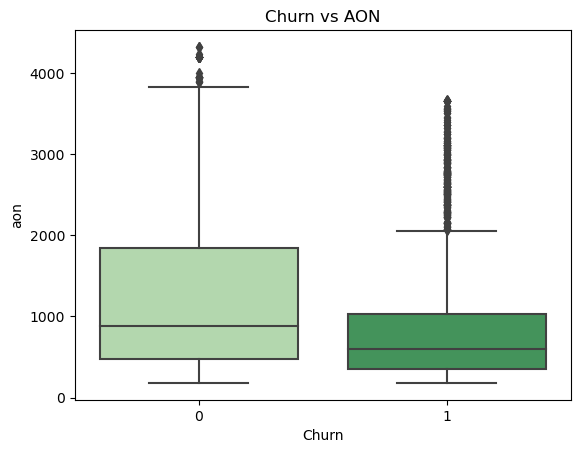

In [36]:
# Plotting Churn vs AON
sns.boxplot(x = cust.Churn, y= cust.aon ,palette="Greens")
plt.title("Churn vs AON")
plt.show()


In [37]:
# creating function to anlyze the features across 6th, 7th and 8th month
def analyze_feature(feature_start):
    plt.rcParams["figure.figsize"] = [17, 7]
    fig = plt.figure()
    print("Churn Stats (mean and standard deviation):")
    cols = {c: feature_start + "_" + str(c) for c in [6,7,8]}
    print(cols)
    frame_data = []
    [frame_data.append({
        "mean_6": cust[cust["Churn"] == Churn][cols[6]].mean(),
        "mean_7": cust[cust["Churn"] == Churn][cols[7]].mean(),
        "mean_8": cust[cust["Churn"] == Churn][cols[8]].mean(),
        "std_6": cust[cust["Churn"] == Churn][cols[6]].std(),
        "std_7": cust[cust["Churn"] == Churn][cols[7]].std(),
        "std_8": cust[cust["Churn"] == Churn][cols[8]].std()
    }) for Churn in [0,1]]
    
    f,axes = plt.subplots(nrows=1, ncols=3)
    sns.boxplot(data=cust, y=feature_start + "_6", x="Churn",
                hue="Churn", linewidth=2.5, showfliers=False, ax=axes[0])
    sns.boxplot(data=cust, y=feature_start + "_7",  x="Churn",
                hue="Churn", linewidth=2.5, showfliers=False, ax=axes[1])
    sns.boxplot(data=cust, y=feature_start + "_8",  x="Churn",
                hue="Churn", linewidth=2.5, showfliers=False, ax=axes[2])
    

Churn Stats (mean and standard deviation):
{6: 'total_rech_amt_6', 7: 'total_rech_amt_7', 8: 'total_rech_amt_8'}


<Figure size 1700x700 with 0 Axes>

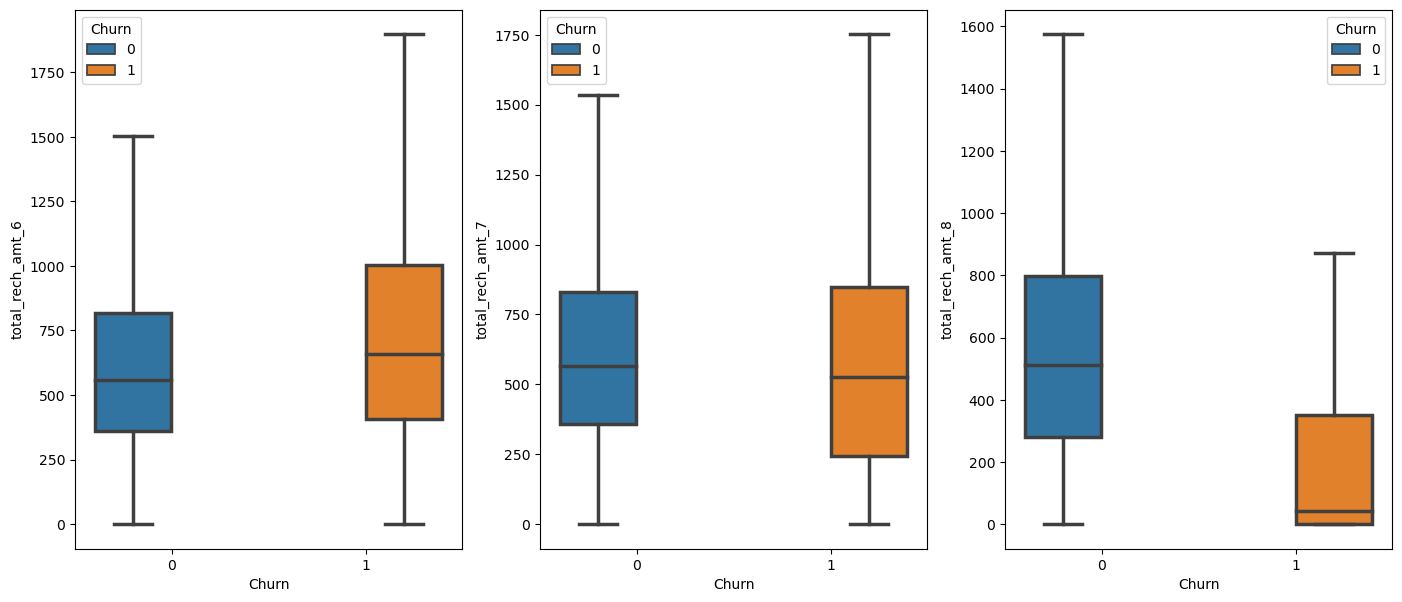

In [38]:
analyze_feature('total_rech_amt')
plt.show()

Churn Stats (mean and standard deviation):
{6: 'max_rech_amt_6', 7: 'max_rech_amt_7', 8: 'max_rech_amt_8'}


<Figure size 1700x700 with 0 Axes>

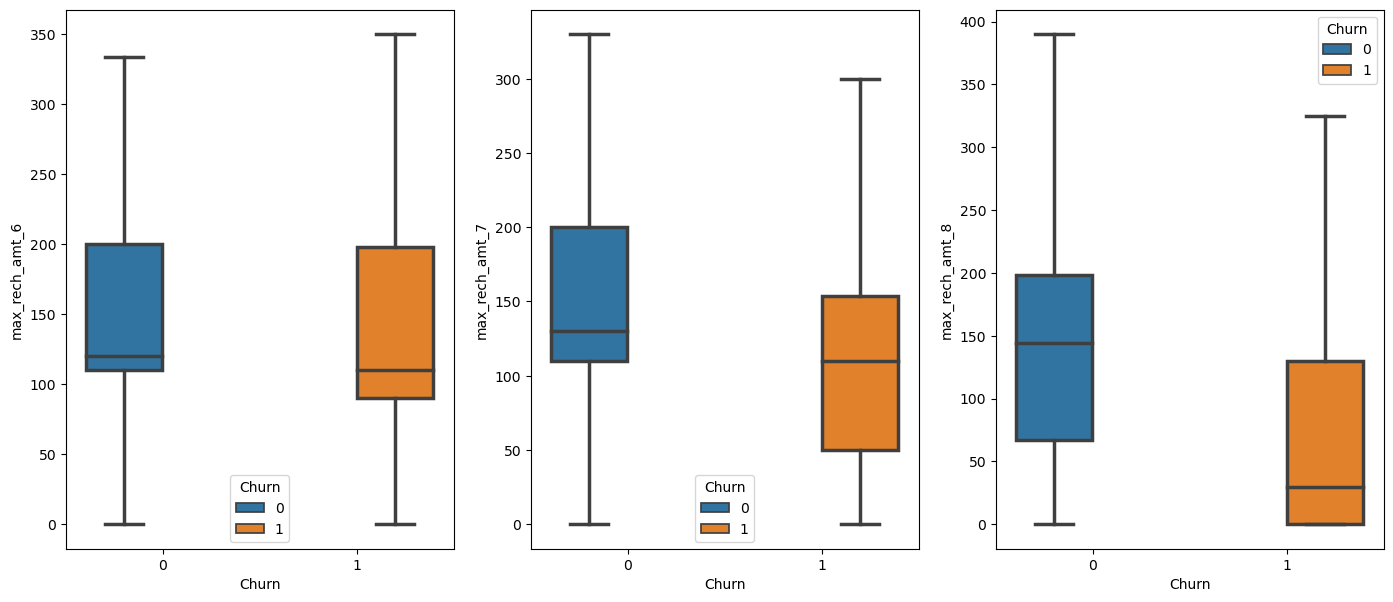

In [39]:
analyze_feature('max_rech_amt')
plt.show()

## Model Building


### Splitting Train and Test Data

In [32]:
# Putting feature variable to X
X = cust.drop('Churn',axis=1)

# Putting response variable to y
y = cust['Churn']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(20967, 145)
(8986, 145)
(20967,)
(8986,)


### Dealing with Class Imbalance using SMOTE

In [34]:
# Performing oversampling using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 100)

In [35]:
# Fitting SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

### Feature Scaling

In [36]:
# Scaling using Standardization method
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
X_train = X_train.drop('mobile_number',axis=1)
X_train = X_train.drop('circle_id',axis=1)
X_test = X_test.drop('mobile_number',axis=1)
X_test = X_test.drop('circle_id',axis=1)


In [38]:
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
14483,0.0,0.0,0.0,7283.872,7199.400,6194.049,125.69,209.93,171.08,550.13,1005.83,1054.91,697.74,565.83,210.29,675.83,670.01,238.39,0.00,0.36,9.69,0.00,219.93,318.78,0.00,0.58,8.49,0.00,1.13,11.03,0.00,220.88,336.98,0.00,90.81,144.79,0.00,234.04,505.81,0.0,0.0,0.0,0.0,0.0,0.0,0.00,324.86,650.61,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,545.74,987.59,0.00,0.00,17.21,0.00,178.34,205.21,0.00,2.01,2.30,0.00,180.36,224.73,0.00,132.46,130.51,0.00,201.43,379.36,0.00,0.50,0.00,0.0,0.0,0.0,0.00,334.39,509.88,0.00,514.76,734.81,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.20,11,10,12,7300,6500,6039,1050,1050,1050,1050,500,250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,252,0.00,0.00,0.00,339.86
8922,0.0,0.0,0.0,346.368,394.770,614.801,4.18,28.69,19.81,324.26,290.41,298.89,0.00,0.00,0.00,0.00,0.00,0.00,4.18,25.86,19.81,318.13,269.98,287.34,6.13,20.43,0.99,0.00,0.00,0.00,328.44,316.28,308.16,0.00,2.83,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.83,0.00,0.0,0.0,7.01,0.00,0.00,3.53,0.00,0.0,0.0,328.44,319.11,318.71,17.01,30.56,18.41,448.88,469.59,574.44,83.14,57.16,41.39,549.04,557.33,634.26,2.15,9.73,0.00,0.00,0.00,0.93,16.98,0.00,0.00,0.0,0.0,0.0,19.13,9.73,0.93,647.13,567.06,635.19,0.00,0.0,0.0,78.95,0.00,0.00,0.00,0.00,0.00,8,5,7,474,427,784,200,154,279,120,120,0,1.0,1.0,1.0,154.0,154.0,179.0,154.0,154.0,179.0,0.00,0.00,0.00,608.11,1105.57,1172.47,1,1,0,0,0,0,0,0,1,0,0,0,3954,0.00,0.00,0.00,0.00
15014,0.0,0.0,0.0,430.686,343.779,499.884,36.18,48.29,105.88,25.08,45.36,79.81,8.68,1.01,6.74,0.65,0.00,0.78,25.53,43.56,101.66,24.26,32.81,78.63,0.00,0.00,0.00,0.45,1.61,0.00,49.79,76.38,180.29,9.99,4.73,4.21,0.00,10.93,0.40,0.0,0.0,0.0,0.0,0.0,0.0,9.99,15.66,4.61,0.0,0.0,0.00,0.81,1.61,0.00,0.00,0.0,0.0,60.61,93.66,184.91,94.68,100.79,171.03,159.16,143.93,211.99,1.08,0.00,2.21,254.93,244.73,385.24,14.58,0.00,15.71,9.81,1.30,20.19,1.51,8

In [39]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,570.375,870.036,657.427,214.18,197.56,145.96,575.96,766.01,1211.56,265.86,538.43,0.00,406.18,759.93,0.00,9.06,16.98,72.49,61.84,17.14,185.83,42.43,1.48,6.09,0.0,1.00,8.43,113.34,35.61,264.43,148.53,42.78,73.46,120.58,125.24,958.33,1.50,0.0,53.69,0.0,0.0,0.0,270.61,168.03,1085.49,0.0,0.0,4.8,0.00,1.00,8.43,0.93,0.0,0.0,384.89,204.64,1363.16,0.70,0.55,0.00,122.64,30.54,78.03,14.78,0.00,41.96,138.13,31.09,119.99,4.20,7.14,61.39,41.04,20.03,215.19,0.00,0.00,3.91,0.0,0.0,0.0,45.24,27.18,280.51,183.38,78.33,494.41,0.00,0.00,0.11,0.0,20.04,93.78,0.00,0.00,0.0,6,9,9,692,1024,885,128,128,144,128,128,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,498,0.00,0.00,0.0,0.00
1,0.0,0.0,0.0,767.361,149.368,26.508,373.13,61.74,4.11,778.64,146.41,2.69,0.00,2.09,7.11,0.00,1.00,6.81,57.68,2.09,0.00,69.54,6.09,0.00,3.75,0.00,0.00,0.0,0.21,0.00,130.98,8.19,0.00,315.44,59.64,0.00,697.76,118.49,0.00,7.58,0.0,0.00,0.0,0.0,0.0,1020.79,178.14,0.00,0.0,0.0,0.0,9.88,46.43,0.00,3.78,0.0,0.0,1165.44,232.78,0.00,222.14,188.34,0.00,49.24,39.06,0.00,2.96,0.70,0.00,274.36,228.11,0.00,30.43,12.06,0.00,92.11,200.64,0.00,45.31,11.55,0.00,0.0,0.0,0.0,167.86,224.26,0.00,442.66,461.33,0.00,0.03,0.00,0.00,0.0,0.00,0.00,0.40,8.95,0.0,12,11,4,820,164,30,110,50,30,50,7,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,189,0.00,0.00,0.0,0.00
2,0.0,0.0,0.0,177.840,116.427,167.601,0.98,0.26,5.09,35.91,8.58,72.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.26,5.09,31.23,7.88,72.63,0.00,0.70,0.00,0.0,0.00,0.00,31.23,8.84,77.73,0.98,0.00,0.00,4.68,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,5.66,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.01,0.00,0.0,0.0,36.89,8.84,77.74,69.14,143.33,8.09,52.83,9.59,111.28,4.64,0.00,0.40,126.63,152.93,119.78,0.00,1.93,6.39,0.00,1.80,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,3.73,6.39,127.19,156.93,126.18,0.00,0.13,0.0

In [40]:
# Fit the data into scaler and transform
cols_scale = X_train.columns.to_list()
cols_scale

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou

In [41]:
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,-0.034421,0.762334,0.629958,-0.167384,-0.144513,-0.057802,0.364548,0.884592,2.396899,2.546535,5.107734,-0.203610,2.561542,6.170174,-0.265454,-0.327170,-0.251598,0.144716,-0.356434,-0.540778,0.479211,2.243408,-0.186907,0.146772,-0.260952,-0.097200,1.092362,-0.313694,-0.515366,0.406077,-0.133844,-0.356096,-0.105560,-0.239429,-0.179648,2.523246,-0.015969,-0.13992,5.836238,0.0,0.0,0.0,-0.253623,-0.358000,1.719231,-0.068717,-0.056836,0.090261,-0.373286,-0.296635,0.227648,0.060903,-0.024238,-0.012462,-0.392770,-0.578720,1.658771,-0.403660,-0.394644,-0.332271,-0.036119,-0.481599,-0.082343,0.074531,-0.289831,0.957246,-0.208221,-0.574525,-0.079914,-0.169183,-0.106418,1.020145,0.141910,-0.082222,2.332702,-0.147920,-0.146777,0.154935,0.0,0.0,0.0,-0.021127,-0.135044,2.282669,-0.224784,-0.505542,1.059178,-0.463303,-0.216518,1.177578,-0.187957,0.130431,1.527980,-0.089944,-0.091853,-0.081995,-0.701197,-0.242533,0.180862,-0.006238,0.745571,0.845574,-0.232069,-0.193412,0.132171,0.204815,0.310682,0.502434,-0.619650,-0.588577,-0.448807,-0.672104,-0.621719,-0.509237,-0.676474,-0.637536,-0.491316,-0.407636,-0.374205,-0.272817,-0.394552,-0.386955,-0.314674,-0.303684,-0.300692,-0.271841,-0.426250,-0.417716,-0.327389,-0.295486,-0.281632,-0.254906,-0.202071,-0.194903,-0.150271,-0.650737,-0.331236,-0.383695,-0.384044,-0.120737
1,0.0,0.0,0.0,0.407138,-0.853058,-0.763848,0.188501,-0.458811,-0.441398,0.781885,-0.456259,-0.576348,-0.231475,-0.187699,-0.127355,-0.269264,-0.281385,-0.203132,-0.066207,-0.328146,-0.292857,-0.320497,-0.595933,-0.505037,-0.071152,-0.274659,-0.250225,-0.260952,-0.182208,-0.213298,-0.258266,-0.603448,-0.513916,0.276168,-0.312494,-0.332759,1.103368,-0.196140,-0.342790,0.542399,-0.13992,-0.116511,0.0,0.0,0.0,0.953791,-0.340991,-0.445177,-0.068717,-0.056836,-0.037398,0.212829,2.008676,-0.289826,0.841927,-0.024238,-0.012462,0.758105,-0.536025,-0.634453,1.276584,1.

In [42]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
14483,0.0,0.0,0.0,15.014385,14.949735,12.861288,-0.365511,-0.115888,0.010129,0.311361,1.403577,2.011615,7.059312,5.378262,2.051757,4.440824,5.405777,1.916161,-0.375798,-0.337039,-0.234365,-0.645050,0.471425,1.183380,-0.295547,-0.240269,0.303224,-0.260952,-0.083211,1.495057,-0.669831,0.079785,0.658489,-0.498706,-0.231884,0.115052,-0.519956,0.086191,1.169914,-0.153724,-0.13992,-0.116511,0.0,0.0,0.0,-0.689169,-0.094152,0.852104,-0.068717,-0.056836,-0.037398,-0.373286,-0.347380,-0.289826,-0.193958,-0.024238,-0.012462,-0.960267,-0.061189,1.026955,-0.408971,-0.398955,-0.182905,-0.662063,0.323906,0.639440,-0.312159,-0.241902,-0.199910,-0.709073,-0.006106,0.338766,-0.226558,1.689894,2.374790,-0.340610,1.854248,4.282995,-0.147920,-0.115785,-0.111159,0.0,0.0,0.0,-0.387712,2.237284,4.371069,-0.796984,0.866818,1.865411,-0.463303,-0.216518,-0.190725,-0.187957,-0.167312,-0.141025,-0.089944,-0.091853,-0.062873,-0.154179,-0.127086,0.542066,12.277585,10.769712,10.243456,5.268970,5.174460,5.867935,6.903424,3.186898,1.448965,-0.619650,-0.588577,-0.448807,-0.672104,-0.621719,-0.509237,-0.676474,-0.637536,-0.491316,-0.407636,-0.374205,-0.272817,-0.394552,-0.386955,-0.314674,-0.303684,-0.300692,-0.271841,-0.426250,-0.417716,-0.327389,-0.295486,-0.281632,-0.254906,-0.202071,-0.194903,-0.150271,-0.940324,-0.331236,-0.383695,-0.384044,8.965014
8922,0.0,0.0,0.0,-0.536550,-0.302985,0.535790,-0.637569,-0.535291,-0.398941,-0.153726,-0.144635,0.152163,-0.231475,-0.208334,-0.203610,-0.269264,-0.289886,-0.265454,-0.353363,-0.205948,-0.173278,0.839706,0.721243,1.016858,0.071264,0.936680,-0.185688,-0.260952,-0.204805,-0.213298,0.362193,0.386243,0.558220,-0.498706,-0.459412,-0.332759,-0.519956,-0.485655,-0.342790,-0.153724,-0.13992,-0.116511,0.0,0.0,0.0,-0.689169,-0.635930,-0.445177,-0.068717,-0.056836,0.149038,-0.373286,-0.347380,-0.073138,-0.193958,-0.024238,-0.012462,-0.476002,-0.405041,-0.098292,-0.2

### PCA

In [43]:
#Importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state = 100)

In [44]:
pca.fit(X_train)

PCA(random_state=100)

In [45]:
pca.components_

array([[ 1.93054722e-19, -2.77555756e-17, -2.22044605e-16, ...,
         5.08357854e-03, -4.83952961e-03,  1.50553746e-02],
       [-1.92632125e-19, -2.77555756e-17,  2.22044605e-16, ...,
         1.46810694e-01,  1.33745462e-01,  4.05266111e-02],
       [ 2.13907552e-19, -1.24900090e-16,  1.94289029e-16, ...,
         1.35639525e-01,  1.16708803e-01,  3.59558959e-02],
       ...,
       [ 0.00000000e+00,  7.65144432e-02,  1.00906724e-01, ...,
         5.20417043e-18,  7.63278329e-17,  1.77809156e-17],
       [ 9.99996579e-01,  2.36663531e-03, -1.03208785e-03, ...,
        -2.84603070e-19,  6.77626358e-20, -4.00646584e-19],
       [-0.00000000e+00,  3.35143808e-01,  8.58957648e-01, ...,
         9.71445147e-17, -5.55111512e-17, -3.46944695e-17]])

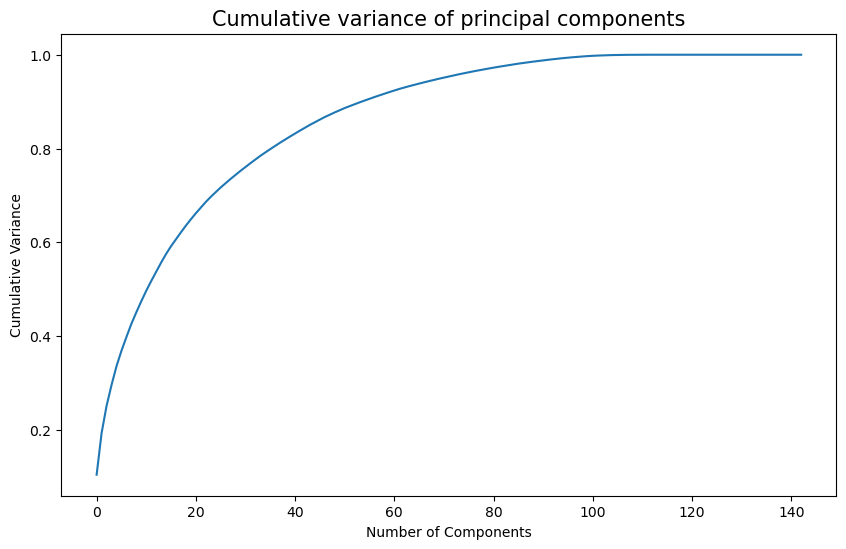

In [46]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot( np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative variance of principal components",size=15)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.show()

#### Here nearly 70 features explain more than 90% of the variance. So will perform PCA using 70 features

In [47]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [48]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=70)

In [49]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

In [50]:
# transform test set
X_test_pca = pca_final.transform(X_test)

## Logisitic Regression with PCA

In [59]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [60]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)
# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 
# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [61]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.351633,0.007232,0.012296,0.001943,0.01,{'C': 0.01},0.886950,0.882735,0.891344,0.897695,0.898914,0.891528,0.006179,3,0.89269,0.891340,0.892435,0.891820,0.889946,0.891646,0.000972
1,0.459839,0.025728,0.013418,0.000705,0.1,{'C': 0.1},0.885908,0.882475,0.891871,0.898213,0.898139,0.891321,0.006353,6,0.89282,0.891990,0.892630,0.892080,0.890272,0.891958,0.000900
2,0.516062,0.042496,0.013144,0.000455,1,{'C': 1},0.886168,0.882735,0.892397,0.897954,0.898656,0.891582,0.006307,1,0.89308,0.892316,0.892565,0.892341,0.890402,0.892141,0.000912
3,0.500172,0.061349,0.012183,0.000813,10,{'C': 10},0.886168,0.882475,0.892397,0.897436,0.899173,0.891530,0.006400,2,0.89282,0.892186,0.892435,0.892406,0.890272,0.892024,0.000899
4,0.554168,0.064160,0.011418,0.001240,100,{'C': 100},0.886168,0.882475,0.892134,0.897436,0.899173,0.891477,0.006393,4,0.89295,0.892316,0.892306,0.892276,0.890141,0.891998,0.000962
5,0.484013,0.043620,0.012362,0.001056,1000,{'C': 1000},0.886429,0.882475,0.891871,0.897436,0.899173,0.891477,0.006347,5,0.89295,0.892316,0.892241,0.892276,0.890076,0.891972,0.000983


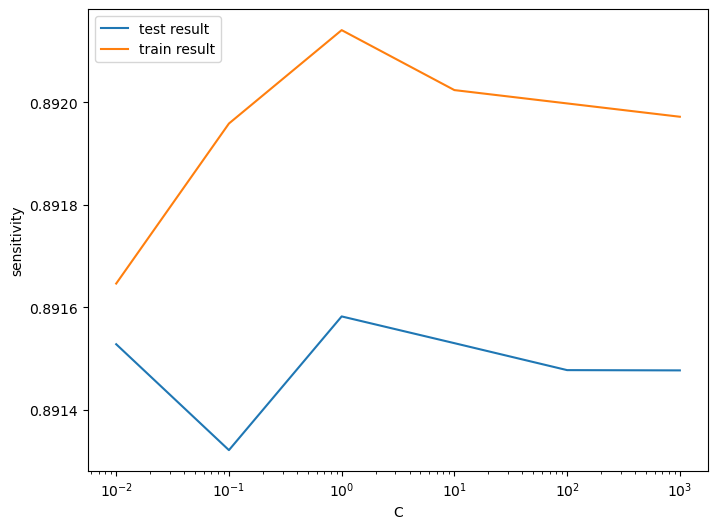

In [62]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [63]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8915819708084454 at C = 1


### Logistic Regression using optimal C

In [64]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

In [65]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [66]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[16190  3025]
 [ 2059 17156]]


In [67]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [68]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8677075201665365
Sensitivity:- 0.8928441321883945
Specificity:- 0.8425709081446786


In [69]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [70]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6964 1341]
 [ 142  539]]


In [71]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [72]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8349655018918317
Sensitivity:- 0.7914831130690162
Specificity:- 0.8385310054184226


#### The model has performed fairly well on the test dataset.

## Decision Tree with PCA

In [73]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [74]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [75]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.012094,0.033515,0.014557,0.001241,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.760604,0.828780,0.830341,0.826438,0.825657,0.814364,0.026932,5
1,4.013853,0.024267,0.015422,0.001853,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.760604,0.828780,0.830341,0.826438,0.825657,0.814364,0.026932,5
2,3.975815,0.056958,0.014112,0.001029,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.760604,0.828780,0.825137,0.824876,0.825917,0.813063,0.026266,7
3,3.963753,0.045948,0.013701,0.000844,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.760604,0.828780,0.825137,0.824876,0.825917,0.813063,0.026266,7
4,6.641619,0.064570,0.014942,0.000978,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.776737,0.856622,0.855321,0.854801,0.857663,0.840229,0.031762,2
5,6.599931,0.073640,0.016346,0.002545,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.776737,0.856622,0.856883,0.854801,0.856622,0.840333,0.031807,1
6,6.349432,0.237324,0.014873,0.001242,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.771012,0.824356,0.837367,0.824096,0.845954,0.820557,0.026112,3
7,159.306474,308.318640,0.012145,0.003628,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.771012,0.824356,0.837367,0.824096,0.845954,0.820557,0.026112,3


In [76]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.8403330731199583
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [77]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [78]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [79]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[16402  2813]
 [ 2394 16821]]


In [80]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [81]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8645068956544366
Sensitivity:- 0.8754098360655738
Specificity:- 0.8536039552432995


In [82]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [83]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6794 1511]
 [ 214  467]]


In [84]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [85]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8080347206766081
Sensitivity:- 0.6857562408223201
Specificity:- 0.8180614087898856


#### Here the Accuracy and the specificity is good as compared to train data but the Sensitivity is reduced.

## Random Forest with PCA

In [86]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12,15],
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(50, 200, 50),
    'n_estimators': [100,150,200], 
    'max_features': [3,5, 8]
}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [87]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)  

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 12, 15], 'max_features': [3, 5, 8],
                         'min_samples_leaf': range(50, 200, 50),
                         'min_samples_split': range(50, 200, 50),
                         'n_estimators': [100, 150, 200]},
             verbose=1)

In [88]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8711423367161073
{'max_depth': 15, 'max_features': 8, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}


In [89]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=15,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=8,
                             n_estimators=100)


In [92]:
# fit
rfc.fit(X_train_pca, y_train)
# predict
predictions = rfc.predict(X_train_pca)
y_pred = rfc.predict_proba(X_train_pca)

In [94]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6794 1511]
 [ 214  467]]


In [97]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [98]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Snesitivity
print("Sensitivity:-", TP / float(TP+FN))

# Specificity
print("Specificity:- ",TN / float(TN+FP))

Accuracy:- 0.8080347206766081
Sensitivity:- 0.6857562408223201
Specificity:-  0.8180614087898856


## Logistic Regression without PCA

In [51]:
# Importing stats model
import statsmodels.api as sm

In [52]:
no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [53]:
# Fit the model
no_pca = no_pca.fit().summary()

In [54]:
# Summary
no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38430
Model:                            GLM   Df Residuals:                    38295
Model Family:                Binomial   Df Model:                          134
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 12 Feb 2024   Deviance:                   2.4978e+05
Time:                        20:41:18   Pearson chi2:                 1.22e+19
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                8.48e+14   3.42e+05   2.48e+09      0.000    8.48e+14    8.48e+14
loc_og_t2o_mou     -1.765e+07      0.499  -3.53e+07      0.000   -1.76e+07   -1.76e+07
std_og_t2o_mou      4.495e+06      0.977    4.6e+06      0.000    4.49e+06    4.49e+06
loc_ic_t2o_mou      1.144e+08      2.295   4.98e+07      0.000    1.14e+08    1.14e+08
arpu_6              4.198e+13   1.12e+06   3.74e+07      0.000     4.2e+13     4.2e+13
arpu_7               3.25e+13   1.43e+06   2.26e+07      0.000    3.25e+13    3.25e+13
arpu_8              1.143e+14    1.6e+06   7.14e+07      0.000    1.14e+14    1.14e+14
onnet_mou_6         1.635e+15   3.86e+07   4.23e+07      0.000    1.63e+15    1.63e+15
onnet_mou_7        -1.505e+15   1.77e+07  -8.48e+07      0.000   -1.51e+15   -1.51e+15
onnet_mou_8         2.645e+14   2.39e+07    1.1e+07      0.000    2.65e+14    2.65e+14
offnet_mou_6        1.723e+15   4.18e+07   4.12e+07      0.000    1.72e+15    1.72e+15
offnet_mou_7       -1.495e+15    1.8e+07  -8.32e+07      0.000   -1.49e+15   -1.49e+15
offnet_mou_8        2.231e+14   2.57e+07   8.69e+06      0.000    2.23e+14    2.23e+14
roam_ic_mou_6       1.557e+12   5.56e+05    2.8e+06      0.000    1.56e+12    1.56e+12
roam_ic_mou_7       6.129e+12   6.08e+05   1.01e+07      0.000    6.13e+12    6.13e+12
roam_ic_mou_8       -6.45e+12   5.24e+05  -1.23e+07      0.000   -6.45e+12   -6.45e+12
roam_og_mou_6      -5.474e+14   1.24e+07  -4.42e+07      0.000   -5.47e+14   -5.47e+14
roam_og_mou_7       4.403e+14   4.73e+06   9.31e+07      0.000     4.4e+14     4.4e+14
roam_og_mou_8        -9.1e+13   6.97e+06   -1.3e+07      0.000    -9.1e+13    -9.1e+13
loc_og_t2t_mou_6    1.113e+18   1.28e+10   8.71e+07      0.000    1.11e+18    1.11e+18
loc_og_t2t_mou_7     4.84e+17   1.32e+10   3.67e+07      0.000    4.84e+17    4.84e+17
loc_og_t2t_mou_8    7.429e+16   1.23e+10   6.05e+06      0.000    7.43e+16    7.43e+16
loc_og_t2m_mou_6     1.28e+18   1.47e+10   8.71e+07      0.000    1.28e+18    1.28e+18
loc_og_t2m_mou_7    4.984e+17   1.36e+10   3.66e+07      0.000    4.98e+17    4.98e+17
loc_og_t2m_mou_8    8.466e+16    1.4e+10   6.05e+06      0.000    8.47e+16    8.47e+16
loc_og_t2f_mou_6    9.983e+16   1.15e+09   8.71e+07      0.000    9.98e+16    9.98e+16
loc_og_t2f_mou_7    4.189e+16   1.14e+09   3.66e+07      0.000    4.19e+16    4.19e+16
loc_og_t2f_mou_8    6.902e+15   1.14e+09   6.07e+06      0.000     6.9e+15     6.9e+15
loc_og_t2c_mou_6   -2.175e+13   4.56e+05  -4.77e+07      0.000   -2.17e+13   -2.17e+13
loc_og_t2c_mou_7    1.858e+13   5.45e+05   3.41e+07      0.000    1.86e+13    1.86e+13
loc_og_t2c_mou_8    1.885e+13    4.7e+05   4.01e+07      0.000    1.89e+13    1.89e+13
loc_og_mou_6        -1.78e+18   2.71e+10  -6.58e+07      0.000   -1.78e+18   -1.78e+18
loc_og_mou_7       -7.121e+17   2.77e+

### Feature selection using RFE

In [55]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [56]:
# Importing RFE
from sklearn.feature_selection import RFE

# Instantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select = 15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [57]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('loc_og_t2o_mou', False, 129),
 ('std_og_t2o_mou', False, 128),
 ('loc_ic_t2o_mou', False, 127),
 ('arpu_6', False, 10),
 ('arpu_7', False, 15),
 ('arpu_8', False, 109),
 ('onnet_mou_6', False, 120),
 ('onnet_mou_7', False, 105),
 ('onnet_mou_8', False, 114),
 ('offnet_mou_6', False, 117),
 ('offnet_mou_7', False, 20),
 ('offnet_mou_8', False, 34),
 ('roam_ic_mou_6', False, 64),
 ('roam_ic_mou_7', False, 87),
 ('roam_ic_mou_8', False, 88),
 ('roam_og_mou_6', False, 65),
 ('roam_og_mou_7', False, 23),
 ('roam_og_mou_8', False, 94),
 ('loc_og_t2t_mou_6', False, 91),
 ('loc_og_t2t_mou_7', False, 46),
 ('loc_og_t2t_mou_8', False, 40),
 ('loc_og_t2m_mou_6', False, 90),
 ('loc_og_t2m_mou_7', False, 47),
 ('loc_og_t2m_mou_8', False, 41),
 ('loc_og_t2f_mou_6', False, 43),
 ('loc_og_t2f_mou_7', False, 42),
 ('loc_og_t2f_mou_8', False, 74),
 ('loc_og_t2c_mou_6', False, 81),
 ('loc_og_t2c_mou_7', False, 80),
 ('loc_og_t2c_mou_8', False, 62),
 ('loc_og_mou_6', False, 31),
 ('loc_og_mou_7', False

In [58]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['loc_ic_mou_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')


### Model 1

In [59]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
no_pca_1 = no_pca_1.fit()

no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38430
Model:                            GLM   Df Residuals:                    38414
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8271.1
Date:                Mon, 12 Feb 2024   Deviance:                       16542.
Time:                        20:43:51   Pearson chi2:                 1.92e+07
No. Iterations:                    65   Pseudo R-squ. (CS):             0.6155
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              7903.6839   1.69e+05      0.047      0.963   -3.23e+05    3.39e+05
loc_ic_mou_8         -3.3535      0.074    -45.381      0.000      -3.498      -3.209
total_rech_data_6  4.921e+04   2.22e+06      0.022      0.982   -4.29e+06    4.39e+06
total_rech_data_7  4.773e+04   2.58e+06      0.018      0.985   -5.01e+06    5.11e+06
total_rech_data_8    -0.9056      0.221     -4.092      0.000      -1.339      -0.472
monthly_2g_6      -6428.3026   2.89e+05     -0.022      0.982   -5.74e+05    5.61e+05
monthly_2g_7      -6167.6949   3.34e+05     -0.018      0.985    -6.6e+05    6.48e+05
sachet_2g_6        -4.19e+04   1.89e+06     -0.022      0.982   -3.74e+06    3.65e+06
sachet_2g_7       -4.109e+04   2.22e+06     -0.018      0.985    -4.4e+06    4.32e+06
sachet_2g_8          -0.2740      0.194     -1.410      0.159      -0.655       0.107
monthly_3g_6      -9274.9233   4.17e+05     -0.022      0.982   -8.28e+05    8.09e+05
monthly_3g_7      -8863.7427    4.8e+05     -0.018      0.985   -9.49e+05    9.31e+05
monthly_3g_8         -0.5336      0.069     -7.777      0.000      -0.668      -0.399
sachet_3g_6       -1.709e+04   7.69e+05     -0.022      0.982   -1.52e+06    1.49e+06
sachet_3g_7       -1.624e+04   8.79e+05     -0.018      0.985   -1.74e+06    1.71e+06
sachet_3g_8          -0.3476      0.112     -3.106      0.002      -0.567      -0.128
=====================================================================================
"""

In [60]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_rech_data_7,71.16
7,sachet_2g_7,56.84
1,total_rech_data_6,54.07
3,total_rech_data_8,52.16
6,sachet_2g_6,42.70
8,sachet_2g_8,37.20
13,sachet_3g_7,11.27
12,sachet_3g_6,8.80
14,sachet_3g_8,7.82
10,monthly_3g_7,4.41


In [62]:
# Removing total_rech_data_7 column 
log_cols = rfe_cols.to_list()
log_cols.remove("total_rech_data_7")
print(log_cols)

['loc_ic_mou_8', 'total_rech_data_6', 'total_rech_data_8', 'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']


### Model 2

In [63]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
no_pca_2 = no_pca_2.fit()

no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38430
Model:                            GLM   Df Residuals:                    38415
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9437.4
Date:                Mon, 12 Feb 2024   Deviance:                       18875.
Time:                        20:43:56   Pearson chi2:                 5.85e+06
No. Iterations:                   100   Pseudo R-squ. (CS):             0.5915
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.045e+04   1.61e+05      0.251      0.802   -2.75e+05    3.56e+05
loc_ic_mou_8         -3.2150      0.065    -49.110      0.000      -3.343      -3.087
total_rech_data_6  4.433e+05   1.76e+06      0.251      0.802   -3.01e+06     3.9e+06
total_rech_data_8     0.9297      0.167      5.553      0.000       0.602       1.258
monthly_2g_6       -5.79e+04    2.3e+05     -0.251      0.802   -5.09e+05    3.94e+05
monthly_2g_7         -0.5282      0.033    -16.153      0.000      -0.592      -0.464
sachet_2g_6       -3.774e+05    1.5e+06     -0.251      0.802   -3.32e+06    2.57e+06
sachet_2g_7          -0.1485      0.038     -3.902      0.000      -0.223      -0.074
sachet_2g_8          -1.8372      0.151    -12.171      0.000      -2.133      -1.541
monthly_3g_6      -8.354e+04   3.32e+05     -0.251      0.802   -7.35e+05    5.68e+05
monthly_3g_7         -0.2091      0.033     -6.307      0.000      -0.274      -0.144
monthly_3g_8         -0.9463      0.060    -15.692      0.000      -1.065      -0.828
sachet_3g_6       -1.539e+05   6.12e+05     -0.251      0.802   -1.35e+06    1.05e+06
sachet_3g_7           0.0186      0.044      0.425      0.671      -0.067       0.104
sachet_3g_8          -0.9794      0.096    -10.168      0.000      -1.168      -0.791
=====================================================================================
"""

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_rech_data_8,50.14
1,total_rech_data_6,40.64
7,sachet_2g_8,35.52
5,sachet_2g_6,32.98
13,sachet_3g_8,7.56
11,sachet_3g_6,7.11
10,monthly_3g_8,3.60
8,monthly_3g_6,3.06
12,sachet_3g_7,2.59
6,sachet_2g_7,2.55


In [65]:
# Removing monthly_2g_6 column
log_cols.remove("monthly_2g_6")

### Model 3

In [66]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
no_pca_3 = no_pca_3.fit()

no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38430
Model:                            GLM   Df Residuals:                    38416
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14438.
Date:                Mon, 12 Feb 2024   Deviance:                       28877.
Time:                        20:43:58   Pearson chi2:                 4.12e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4700
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6918      0.021    -33.321      0.000      -0.732      -0.651
loc_ic_mou_8         -2.5956      0.042    -62.377      0.000      -2.677      -2.514
total_rech_data_6     5.9668      0.119     50.327      0.000       5.734       6.199
total_rech_data_8     1.7501      0.124     14.155      0.000       1.508       1.992
monthly_2g_7         -1.5340      0.032    -48.048      0.000      -1.597      -1.471
sachet_2g_6          -5.0997      0.105    -48.710      0.000      -5.305      -4.895
sachet_2g_7          -0.0266      0.026     -1.004      0.315      -0.078       0.025
sachet_2g_8          -2.4770      0.110    -22.465      0.000      -2.693      -2.261
monthly_3g_6         -1.1778      0.032    -37.182      0.000      -1.240      -1.116
monthly_3g_7         -0.3069      0.027    -11.302      0.000      -0.360      -0.254
monthly_3g_8         -1.1522      0.044    -26.190      0.000      -1.238      -1.066
sachet_3g_6          -2.0329      0.049    -41.109      0.000      -2.130      -1.936
sachet_3g_7          -0.0374      0.030     -1.245      0.213      -0.096       0.021
sachet_3g_8          -0.9450      0.059    -16.108      0.000      -1.060      -0.830
=====================================================================================
"""

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_rech_data_8,50.04
6,sachet_2g_8,35.51
1,total_rech_data_6,29.42
4,sachet_2g_6,24.10
12,sachet_3g_8,7.55
10,sachet_3g_6,5.59
9,monthly_3g_8,3.60
11,sachet_3g_7,2.59
7,monthly_3g_6,2.56
5,sachet_2g_7,2.54


In [68]:
# Removing sachet_2g_7 column
log_cols.remove("sachet_2g_7")

### Model 4

In [69]:
# Adding constant to X_train
X_train_sm_4 = sm.add_constant(X_train[log_cols])

#Instantiate the model
no_pca_4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Fit the model
no_pca_4 = no_pca_4.fit()

no_pca_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38430
Model:                            GLM   Df Residuals:                    38417
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14439.
Date:                Mon, 12 Feb 2024   Deviance:                       28878.
Time:                        20:43:59   Pearson chi2:                 4.00e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4700
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6921      0.021    -33.338      0.000      -0.733      -0.651
loc_ic_mou_8         -2.5949      0.042    -62.369      0.000      -2.676      -2.513
total_rech_data_6     5.9673      0.119     50.330      0.000       5.735       6.200
total_rech_data_8     1.7387      0.123     14.122      0.000       1.497       1.980
monthly_2g_7         -1.5322      0.032    -48.084      0.000      -1.595      -1.470
sachet_2g_6          -5.1119      0.104    -49.141      0.000      -5.316      -4.908
sachet_2g_8          -2.4824      0.110    -22.532      0.000      -2.698      -2.266
monthly_3g_6         -1.1776      0.032    -37.184      0.000      -1.240      -1.116
monthly_3g_7         -0.3064      0.027    -11.289      0.000      -0.360      -0.253
monthly_3g_8         -1.1499      0.044    -26.179      0.000      -1.236      -1.064
sachet_3g_6          -2.0297      0.049    -41.136      0.000      -2.126      -1.933
sachet_3g_7          -0.0417      0.030     -1.402      0.161      -0.100       0.017
sachet_3g_8          -0.9391      0.058    -16.098      0.000      -1.053      -0.825
=====================================================================================
"""

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_rech_data_8,49.69
5,sachet_2g_8,35.45
1,total_rech_data_6,29.41
4,sachet_2g_6,23.51
11,sachet_3g_8,7.45
9,sachet_3g_6,5.57
8,monthly_3g_8,3.58
6,monthly_3g_6,2.56
10,sachet_3g_7,2.53
7,monthly_3g_7,1.95


In [71]:
# Removing sachet_3g_7 column
log_cols.remove("sachet_3g_7")

### Model 5

In [72]:
# Adding constant to X_train
X_train_sm_5 = sm.add_constant(X_train[log_cols])

#Instantiate the model
no_pca_5 = sm.GLM(y_train, X_train_sm_5, family=sm.families.Binomial())

# Fit the model
no_pca_5 = no_pca_5.fit()

no_pca_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38430
Model:                            GLM   Df Residuals:                    38418
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14440.
Date:                Mon, 12 Feb 2024   Deviance:                       28880.
Time:                        20:44:00   Pearson chi2:                 4.01e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4700
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6925      0.021    -33.358      0.000      -0.733      -0.652
loc_ic_mou_8         -2.5945      0.042    -62.367      0.000      -2.676      -2.513
total_rech_data_6     5.9659      0.119     50.310      0.000       5.733       6.198
total_rech_data_8     1.7294      0.123     14.068      0.000       1.488       1.970
monthly_2g_7         -1.5307      0.032    -48.070      0.000      -1.593      -1.468
sachet_2g_6          -5.1095      0.104    -49.118      0.000      -5.313      -4.906
sachet_2g_8          -2.4755      0.110    -22.494      0.000      -2.691      -2.260
monthly_3g_6         -1.1778      0.032    -37.186      0.000      -1.240      -1.116
monthly_3g_7         -0.3058      0.027    -11.270      0.000      -0.359      -0.253
monthly_3g_8         -1.1484      0.044    -26.161      0.000      -1.234      -1.062
sachet_3g_6          -2.0532      0.047    -44.079      0.000      -2.144      -1.962
sachet_3g_8          -0.9551      0.057    -16.620      0.000      -1.068      -0.842
=====================================================================================
"""

In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_rech_data_8,49.58
5,sachet_2g_8,35.40
1,total_rech_data_6,29.39
4,sachet_2g_6,23.48
10,sachet_3g_8,7.22
9,sachet_3g_6,4.90
8,monthly_3g_8,3.58
6,monthly_3g_6,2.56
7,monthly_3g_7,1.95
3,monthly_2g_7,1.23


In [123]:
# Removing total_rech_data_8 column
log_cols.remove("total_rech_data_8")

### Model 6

In [124]:
# Adding constant to X_train
X_train_sm_6 = sm.add_constant(X_train[log_cols])

#Instantiate the model
no_pca_6 = sm.GLM(y_train, X_train_sm_6, family=sm.families.Binomial())

# Fit the model
no_pca_6 = no_pca_6.fit()

no_pca_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38430
Model:                            GLM   Df Residuals:                    38419
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14543.
Date:                Sat, 10 Feb 2024   Deviance:                       29086.
Time:                        02:41:28   Pearson chi2:                 3.19e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4671
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6539      0.020    -32.194      0.000      -0.694      -0.614
loc_ic_mou_8         -2.5488      0.041    -62.004      0.000      -2.629      -2.468
total_rech_data_6     6.4349      0.116     55.414      0.000       6.207       6.662
monthly_2g_7         -1.4188      0.030    -46.562      0.000      -1.479      -1.359
sachet_2g_6          -5.4985      0.102    -53.852      0.000      -5.699      -5.298
sachet_2g_8          -1.0057      0.032    -31.387      0.000      -1.068      -0.943
monthly_3g_6         -1.2581      0.031    -40.131      0.000      -1.320      -1.197
monthly_3g_7         -0.2897      0.027    -10.816      0.000      -0.342      -0.237
monthly_3g_8         -0.8184      0.036    -22.424      0.000      -0.890      -0.747
sachet_3g_6          -2.2047      0.046    -48.017      0.000      -2.295      -2.115
sachet_3g_8          -0.3430      0.036     -9.478      0.000      -0.414      -0.272
=====================================================================================
"""

In [125]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,total_rech_data_6,27.08
3,sachet_2g_6,21.88
8,sachet_3g_6,4.68
5,monthly_3g_6,2.50
6,monthly_3g_7,1.94
7,monthly_3g_8,1.83
4,sachet_2g_8,1.43
9,sachet_3g_8,1.29
2,monthly_2g_7,1.08
0,loc_ic_mou_8,1.05


In [126]:
# Removing total_rech_data_6 column
log_cols.remove("total_rech_data_6")

### Model 7

In [127]:
# Adding constant to X_train
X_train_sm_6 = sm.add_constant(X_train[log_cols])

#Instantiate the model
no_pca_6 = sm.GLM(y_train, X_train_sm_6, family=sm.families.Binomial())

# Fit the model
no_pca_6 = no_pca_6.fit()

no_pca_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38430
Model:                            GLM   Df Residuals:                    38420
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16872.
Date:                Sat, 10 Feb 2024   Deviance:                       33744.
Time:                        02:41:33   Pearson chi2:                 1.54e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3984
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.7165      0.019    -38.543      0.000      -0.753      -0.680
loc_ic_mou_8    -2.5586      0.038    -66.625      0.000      -2.634      -2.483
monthly_2g_7    -0.7714      0.022    -35.321      0.000      -0.814      -0.729
sachet_2g_6      0.0941      0.018      5.337      0.000       0.060       0.129
sachet_2g_8     -1.0393      0.029    -35.938      0.000      -1.096      -0.983
monthly_3g_6    -0.0831      0.020     -4.077      0.000      -0.123      -0.043
monthly_3g_7    -0.2773      0.024    -11.631      0.000      -0.324      -0.231
monthly_3g_8    -0.7482      0.033    -22.713      0.000      -0.813      -0.684
sachet_3g_6      0.0978      0.020      4.925      0.000       0.059       0.137
sachet_3g_8     -0.3913      0.033    -11.779      0.000      -0.456      -0.326
================================================================================
"""

In [128]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,monthly_3g_7,1.94
6,monthly_3g_8,1.83
4,monthly_3g_6,1.63
3,sachet_2g_8,1.40
2,sachet_2g_6,1.37
8,sachet_3g_8,1.29
7,sachet_3g_6,1.24
0,loc_ic_mou_8,1.04
1,monthly_2g_7,1.02


#### Now from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.

## Model performance on the train set

In [129]:
# Getting the predicted value on the train set
y_train_pred_no_pca = no_pca_6.predict(X_train_sm_6)
y_train_pred_no_pca.head()

0    0.587213
1    0.829154
2    0.131970
3    0.091147
4    0.020768
dtype: float64

### Creating a dataframe with the actual churn and the predicted probabilities

In [130]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.587213,0
1,0,0.829154,1
2,0,0.131970,2
3,0,0.091147,3
4,0,0.020768,4


### Finding Optimal Probablity Cutoff Point

In [131]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.587213,0,1,1,1,1,1,1,0,0,0,0
1,0,0.829154,1,1,1,1,1,1,1,1,1,1,0
2,0,0.131970,2,1,1,0,0,0,0,0,0,0,0
3,0,0.091147,3,1,0,0,0,0,0,0,0,0,0
4,0,0.020768,4,1,0,0,0,0,0,0,0,0,0


In [132]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.696825     0.974707     0.418944
0.2          0.2  0.741634     0.956700     0.526568
0.3          0.3  0.773875     0.938381     0.609368
0.4          0.4  0.795524     0.910435     0.680614
0.5          0.5  0.805256     0.876034     0.734478
0.6          0.6  0.810929     0.829768     0.792090
0.7          0.7  0.803643     0.746812     0.860474
0.8          0.8  0.752953     0.555972     0.949935
0.9          0.9  0.502264     0.004788     0.999740


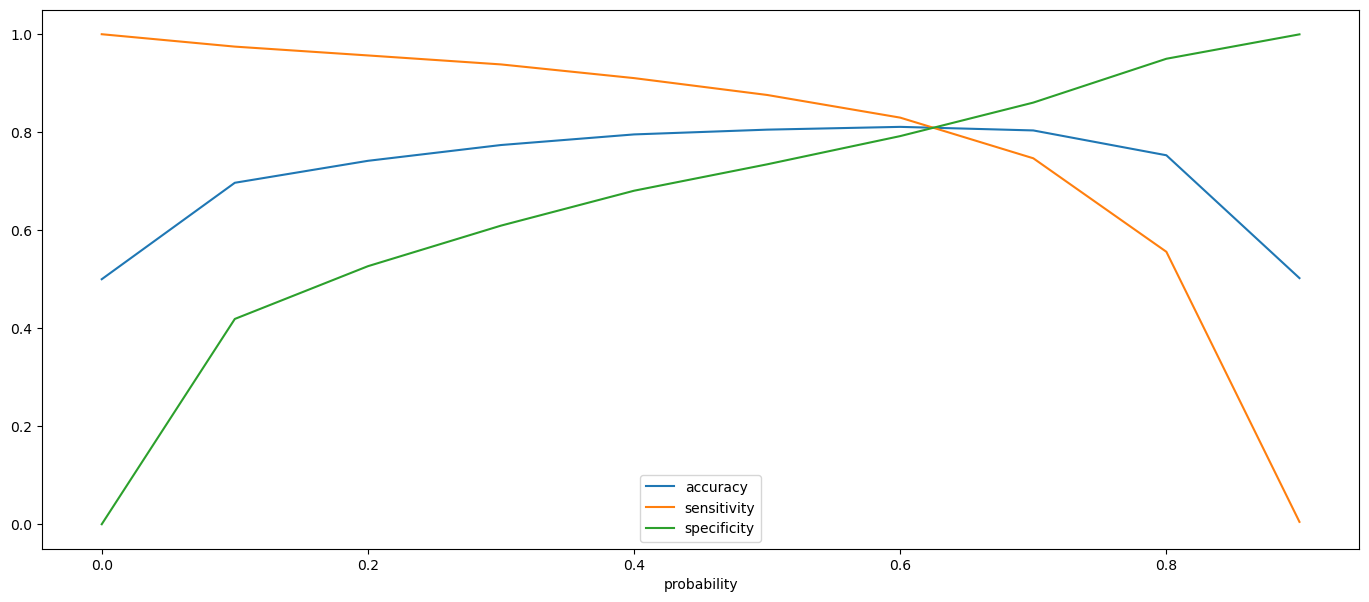

In [133]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

### Analysis of the above curve
Accuracy - It is above 0.6

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

At point 0.6 where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.6 as the optimum probability cutoff, we are taking 0.5 for acheiving higher sensitivity, which is our main goal.

In [134]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.587213,0,1,1,1,1,1,1,0,0,0,0,1
1,0,0.829154,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.131970,2,1,1,0,0,0,0,0,0,0,0,0
3,0,0.091147,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.020768,4,1,0,0,0,0,0,0,0,0,0,0


In [135]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[14113  5102]
 [ 2382 16833]]


In [136]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [137]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.805256310174343
Sensitivity:- 0.8760343481654957
Specificity:- 0.7344782721831902


#### We have got good accuracy, sensitivity and specificity on the train set prediction.

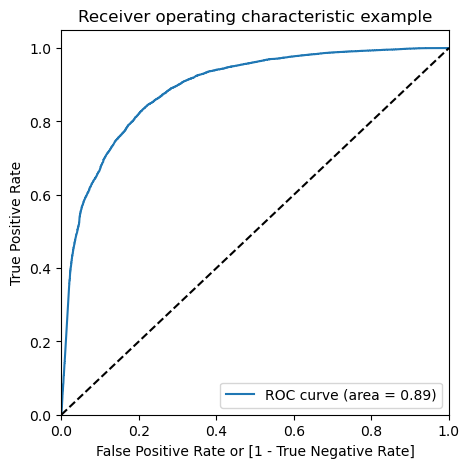

In [138]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

### Testing the model on the test dataset

In [139]:
# Taking a copy of the test set
X_test_log = X_test.copy()
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

In [140]:
# Predict on the test set
y_test_pred = no_pca_6.predict(X_test_sm)
y_test_pred.head()

14483    0.327667
8922     0.000180
15014    0.008980
19846    0.295341
27504    0.164094
dtype: float64

In [141]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
14483,0.327667
8922,0.000180
15014,0.008980
19846,0.295341
27504,0.164094


In [142]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()


,Churn
14483,0
8922,0
15014,0
19846,0
27504,0


In [143]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)
y_test_pred_final.head()

,Churn,CustID,0
0,0,14483,0.327667
1,0,8922,0.000180
2,0,15014,0.008980
3,0,19846,0.295341
4,0,27504,0.164094


In [144]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [145]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [146]:
y_test_pred_final.head()

,Churn,CustID,churn_prob,test_predicted
0,0,14483,0.327667,0
1,0,8922,0.000180,0
2,0,15014,0.008980,0
3,0,19846,0.295341,0
4,0,27504,0.164094,0


In [147]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['Churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[6065 2240]
 [ 147  534]]


In [148]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [149]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['Churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7343645671043846
Sensitivity:- 0.7841409691629956
Specificity:- 0.7302829620710415


#### Overall, the model is performing well in the test set, what it had learnt from the train set.

In [ ]:
# Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).
# Target the customers, whose outgoing others charge in July and incoming others on August are less.
# Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.
# Max Recharge Amount is a strong feature to predict churn.
# Customers with tenure less than 4 yr are more likely to churn.
